# **Assignment 2 – Reinforcement Learning**

**Professor**: Nik Bear Brown

**Author**   : Abhishek Gargha Maheshwarappa

**Nuid**   : 001375462

**# Abstarct**

Designing a simulation of a self-driving cab. The major goal is to demonstrate, in a simplified environment, how you can use RL techniques to develop an efficient smart cab. The aim of the notebook is to Reinforcement Learning and Q Learning to buils cab to 


1.   Drop off the passenger to the right location.
2.   Save passenger's time by taking minimum time possible to drop off
3.   Take care of passenger's safety and traffic rules




![alt text](https://desktopwalls.net/wp-content/uploads/2014/06/New%20York%20City%20Yellow%20Taxi%20Cab%20Free%20Wallpaper%20HD.jpg)

In [0]:
# importing reguired libraries
import numpy as np
import gym
import random

In [2]:
#setting enivornment from gym and visulaising the environment
env = gym.make("Taxi-v3")
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [3]:
env.metadata

{'render.modes': ['human', 'ansi']}

## **Actions and State Space**

### **Six possible actions:**

1. south
2. north
3. east
4. west
5. pickup
6. dropoff

![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRvhjG4jIweDeqUCbWmKMFj3qY2Zg64ZPPAirQrJp265NqFhcrE)

###  **State Space**

The area can be breaken down into a 5x5 grid, which gives us 25 possible taxi locations. There are four locations that we can pick up and drop off a passenger: 

R, G, Y, B or [(0,0), (0,4), (4,0), (4,3)] in (row, col) coordinates.

One additional passenger state of being inside the taxi, there's four destinations and five passenger locations.

So the taxi environment has 5×5×5×4=500 total possible states.



In [4]:
action_size = env.action_space.n
print("Action size ", action_size)

state_size = env.observation_space.n
print("State size ", state_size)

Action size  6
State size  500


* The filled square represents the taxi, which is yellow without a passenger and green with a passenger.
* The pipe ("|") represents a wall which the taxi cannot cross.
* R, G, Y, B are the possible pickup and destination locations. 
* The blue letter represents the current passenger pick-up location, and the purple letter is the current destination.

## **Rewards**

![alt text](https://www.creditcards.com/credit-card-news/wp-content/uploads/track-rewards-like-pro-lg.jpg)

* The agent should receive a high positive reward for a successful dropoff because this behavior is highly desired
* The agent should be penalized if it tries to drop off a passenger in wrong locations
* The agent should get a slight negative reward for not making it to the destination after every time-step. "Slight" negative because we would prefer our agent to reach late instead of making wrong moves trying to reach to the destination as fast as possible


In [5]:
qtable = np.zeros((state_size, action_size))
print(qtable)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


In [0]:

total_episodes = 50000        # Total episodes
total_test_episodes = 100     # Total test episodes
max_steps = 99                # Max steps per episode

learning_rate = 0.7           # Learning rate
gamma = 0.618                 # Discounting rate

# Exploration parameters
epsilon = 1.0                 # Exploration rate
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.01            # Minimum exploration probability 
decay_rate = 0.01 

In [8]:
# List of rewards
rewards = []
total_num_step = 0

# 2 For life or until learning is stopped
for episode in range(total_episodes):
    # Reset the environment
    state = env.reset()
    step = 0
    done = False
    total_rewards = 0
    
    for step in range(max_steps):
        # 3. Choose an action a in the current world state (s)
        ## First we randomize a number
        exp_exp_tradeoff = random.uniform(0,1)
        
        ## If this number > greater than epsilon --> exploitation (taking the biggest Q value for this state)
        if exp_exp_tradeoff > epsilon:
            action = np.argmax(qtable[state,:])
        
        # Else doing a random choice --> exploration
        else:
            action = env.action_space.sample()
        
        # Take the action (a) and observe the outcome state(s') and reward (r)
        new_state, reward, done, info = env.step(action)

        # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
        qtable[state, action] = qtable[state, action] + learning_rate * (reward + gamma * 
                                    np.max(qtable[new_state, :]) - qtable[state, action])
        total_rewards += reward
                
        # Our new state is state
        state = new_state
        
        # If done : finish episode
        if done == True: 
            break
    
    # Reduce epsilon (because we need less and less exploration)
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)
    rewards.append(total_rewards)
    total_num_step  += step


print ("Score over time: " +  str(sum(rewards)/total_episodes))

Score over time: 6.30918


 ### Average number of steps taken per episode

In [9]:
avg = total_num_step/total_episodes

print('Average number of steps taken per episode   ', avg)

Average number of steps taken per episode    12.96932


 Decay rate and starting epsilon were choosen as given in the baseline model later they were tuned for the improvement of the score time

### Changing the policy to **argmin**

Trying with different policy

In [10]:
# List of rewards
rewards = []

# 2 For life or until learning is stopped
for episode in range(total_episodes):
    # Reset the environment
    state = env.reset()
    step = 0
    done = False
    total_rewards = 0
    
    for step in range(max_steps):
        # 3. Choose an action a in the current world state (s)
        ## First we randomize a number
        exp_exp_tradeoff = random.uniform(0,1)
        
        ## If this number > greater than epsilon --> exploitation (taking the biggest Q value for this state)
        if exp_exp_tradeoff > epsilon:
            action = np.argmin(qtable[state,:])
        
        # Else doing a random choice --> exploration
        else:
            action = env.action_space.sample()
        
        # Take the action (a) and observe the outcome state(s') and reward (r)
        new_state, reward, done, info = env.step(action)

        # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
        qtable[state, action] = qtable[state, action] + learning_rate * (reward + gamma * 
                                    np.max(qtable[new_state, :]) - qtable[state, action])
        total_rewards += reward
                
        # Our new state is state
        state = new_state
        
        # If done : finish episode
        if done == True: 
            break
    
    # Reduce epsilon (because we need less and less exploration)
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)
    rewards.append(total_rewards)

print ("Score over time: " +  str(sum(rewards)/total_episodes))


Score over time: -983.9178


Trying with second Large value

In [11]:
# List of rewards
rewards = []

# 2 For life or until learning is stopped
for episode in range(total_episodes):
    # Reset the environment
    state = env.reset()
    step = 0
    done = False
    total_rewards = 0
    
    for step in range(max_steps):
        # 3. Choose an action a in the current world state (s)
        ## First we randomize a number
        exp_exp_tradeoff = random.uniform(0,1)
        
        ## If this number > greater than epsilon --> exploitation (taking the biggest Q value for this state)
        if exp_exp_tradeoff > epsilon:
            action = np.argsort((qtable[state,:]))[-2]
        
        # Else doing a random choice --> exploration
        else:
            action = env.action_space.sample()
        
        # Take the action (a) and observe the outcome state(s') and reward (r)
        new_state, reward, done, info = env.step(action)

        # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
        qtable[state, action] = qtable[state, action] + learning_rate * (reward + gamma * 
                                    np.max(qtable[new_state, :]) - qtable[state, action])
        total_rewards += reward
                
        # Our new state is state
        state = new_state
        
        # If done : finish episode
        if done == True: 
            break
    
    # Reduce epsilon (because we need less and less exploration)
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)
    rewards.append(total_rewards)

print ("Score over time: " +  str(sum(rewards)/total_episodes))

Score over time: -101.9294


### Trying with Random chocie based on proablity 

In [0]:
# List of rewards
rewards = []

# 2 For life or until learning is stopped
for episode in range(total_episodes):
    # Reset the environment
    state = env.reset()
    step = 0
    done = False
    total_rewards = 0
    
    for step in range(max_steps):
        # 3. Choose an action a in the current world state (s)
        ## First we randomize a number
        exp_exp_tradeoff = random.uniform(0,1)
        
        ## If this number > greater than epsilon --> exploitation (taking the biggest Q value for this state)
        if exp_exp_tradeoff > epsilon:
          from scipy.stats import norm
          from numpy.random import choice
          x=np.sum(abs(qtable[state,:]))
          y=(qtable[state,:]/x)
          draw =( choice(qtable[state,:], 1,p=abs(y)))
          s = np.where(qtable[state,:] == draw)
          s = np.asarray(s)
          s.flatten() 
          import pandas as pd
          k = pd.DataFrame(s)
          action = k[0][0]
        
        # Else doing a random choice --> exploration
        else:
            action = env.action_space.sample()
        
        # Take the action (a) and observe the outcome state(s') and reward (r)
        new_state, reward, done, info = env.step(action)

        # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
        qtable[state, action] = qtable[state, action] + learning_rate * (reward + gamma * 
                                    np.max(qtable[new_state, :]) - qtable[state, action])
        total_rewards += reward
                
        # Our new state is state
        state = new_state
        
        # If done : finish episode
        if done == True: 
            break
    
    # Reduce epsilon (because we need less and less exploration)
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)
    rewards.append(total_rewards)

print ("Score over time: " +  str(sum(rewards)/total_episodes))


In [13]:
# List of rewards
rewards = []

# 2 For life or until learning is stopped
for episode in range(total_episodes):
    # Reset the environment
    state = env.reset()
    step = 0
    done = False
    total_rewards = 0
    
    for step in range(max_steps):
        remaing_step =max_steps - step

        # 3. Choose an action a in the current world state (s)
        ## First we randomize a number
        exp_exp_tradeoff = random.uniform(0,1)
        
        ## If this number > greater than epsilon --> exploitation (taking the biggest Q value for this state)
        if exp_exp_tradeoff > epsilon:
          if((remaing_step*0.95)< step):
            action = np.argsort((qtable[state,:]))[-2]
            current_step = step
            remaing_step =max_steps - current_step
          else:
            action = np.argmax((qtable[state,:]))
            current_step = step
            remaing_step =max_steps - current_step

        
        # Else doing a random choice --> exploration
        else:
            action = env.action_space.sample()
            current_step = step
            remaing_step =max_steps - current_step
        
        # Take the action (a) and observe the outcome state(s') and reward (r)
        new_state, reward, done, info = env.step(action)

        # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
        qtable[state, action] = qtable[state, action] + learning_rate * (reward + gamma * 
                                    np.max(qtable[new_state, :]) - qtable[state, action])
        total_rewards += reward
                
        # Our new state is state
        state = new_state
        
        # If done : finish episode
        if done == True: 
            break
    
    # Reduce epsilon (because we need less and less exploration)
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)
    rewards.append(total_rewards)

print ("Score over time: " +  str(sum(rewards)/total_episodes))


Score over time: 7.41606


Done with Changing policy 

In [14]:
env.reset()
rewards = []
frames = [] # for animation
epochs = 0

for episode in range(total_test_episodes):
    state = env.reset()
    step = 0
    done = False
    total_rewards = 0
    #print("****************************************************")
    #print("EPISODE ", episode)

    for step in range(max_steps):
        # UNCOMMENT IT IF YOU WANT TO SEE OUR AGENT PLAYING
        # env.render()
        # Take the action (index) that have the maximum expected future reward given that state
        action = np.argmax(qtable[state,:])
        
        new_state, reward, done, info = env.step(action)
        
        total_rewards += reward
        frames.append({
        'frame': env.render(mode='ansi'),
        'state': state,
        'action': action,
        'reward': reward
        }
    )
        epochs += 1

        if done:
            rewards.append(total_rewards)
            #print ("Score", total_rewards)
            break
        state = new_state
env.close()
print ("Score over time: " +  str(sum(rewards)/total_test_episodes))


Score over time: 8.03


## **Run this only to see the gaming being played** 

In [0]:
from IPython.display import clear_output
from time import sleep

def print_frames(frames):
    for i, frame in enumerate(frames):
        clear_output(wait=True)
        print(frame['frame'])
        print(f"Timestep: {i + 1}")
        print(f"State: {frame['state']}")
        print(f"Action: {frame['action']}")
        print(f"Reward: {frame['reward']}")
        sleep(.5)
        
print_frames(frames)

This to check the game with 85 G as my destination - Home

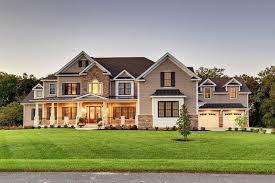

In [15]:
env.reset()

for episode in range(10):
    state = env.reset()
    step = 0
    done = False
    print("****************************************************")
    print("EPISODE ", episode)

    for step in range(max_steps):
        
        # Take the action (index) that have the maximum expected future reward given that state
        action = np.argmax(qtable[state,:])
        
        new_state, reward, done, info = env.step(action)
        
        if done:
            # Here, we decide to only print the last state (to see if our agent is on the goal or fall into an hole)
            env.render()
            print("state=",new_state)
            if new_state == 85:
                print("Hey reached my home 🏆")
            else:
                print("Oh this not my home ☠️")
            
            # We print the number of step it took.
            print("Number of steps", step)
            
            break
        state = new_state
env.close()

****************************************************
EPISODE  0
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
state= 0
Oh this not my home ☠️
Number of steps 16
****************************************************
EPISODE  1
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
state= 85
Hey reached my home 🏆
Number of steps 16
****************************************************
EPISODE  2
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
state= 85
Hey reached my home 🏆
Number of steps 16
****************************************************
EPISODE  3
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
state= 85
Hey reached my home 🏆
Number of steps 13
****************************************************
EPISODE  4
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropo

## **Evaluating the agent**

 Average number of steps taken per episode

In [0]:

total_epochs, total_penalties = 0, 0
episodes = 100

for _ in range(episodes):
    state = env.reset()
    epochs, penalties, reward = 0, 0, 0
    
    done = False
    
    while not done:
        action = np.argmax(qtable[state])
        state, reward, done, info = env.step(action)

        if reward == -10:
            penalties += 1

        epochs += 1

    total_penalties += penalties
    total_epochs += epochs

print(f"Results after {episodes} episodes:")
print(f"Average timesteps per episode: {total_epochs / episodes}")
print(f"Average penalties per episode: {total_penalties / episodes}")

Results after 100 episodes:
Average timesteps per episode: 12.99
Average penalties per episode: 0.0


In [17]:


total_episodes = 50000        # Total episodes
total_test_episodes = 100     # Total test episodes
max_steps = 99                # Max steps per episode

learning_rate = 0.7           # Learning rate
gamma = 0.618                 # Discounting rate

# Exploration parameters
epsilon = 1.0                 # Exploration rate
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.01            # Minimum exploration probability 
decay_rate = 0.01             # Exponential decay rate for exploration prob
qtable = np.zeros((state_size, action_size))
print(qtable)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


In [0]:
# List of rewards
rewards = []

# 2 For life or until learning is stopped
for episode in range(total_episodes):
    # Reset the environment
    state = env.reset()
    step = 0
    done = False
    total_rewards = 0
    
    for step in range(max_steps):
        # 3. Choose an action a in the current world state (s)
        ## First we randomize a number
        exp_exp_tradeoff = random.uniform(0,1)
        
        ## If this number > greater than epsilon --> exploitation (taking the biggest Q value for this state)
        if exp_exp_tradeoff > epsilon:
            action = np.argmax(qtable[state,:])
        
        # Else doing a random choice --> exploration
        else:
            action = env.action_space.sample()
        
        # Take the action (a) and observe the outcome state(s') and reward (r)
        new_state, reward, done, info = env.step(action)

        # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
        qtable[state, action] = qtable[state, action] + learning_rate * (reward + gamma * 
                                    np.max(qtable[new_state, :]) - qtable[state, action])
        total_rewards += reward
                
        # Our new state is state
        state = new_state
        
        # If done : finish episode
        if done == True: 
            break
    
    # Reduce epsilon (because we need less and less exploration)
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)
    rewards.append(total_rewards)

print ("Score over time: " +  str(sum(rewards)/total_episodes))
print(np.argmax(qtable))

Score over time: 6.37714
101


Score over time: 6.37714

This is the baseline model.

Now fine tuning the hyperparameter.

In [0]:
qtable = np.zeros((state_size, action_size))
print(qtable)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


In [0]:

l_rate = [0.7,0.1, 0.25, 0.5]


for rate in l_rate:
  rewards = []
  qtable = np.zeros((state_size, action_size))
  total_episodes = 50000        # Total episodes
  total_test_episodes = 100     # Total test episodes
  max_steps = 99                # Max steps per episode

  #learning_rate = 0.7           # Learning rate
  gamma = 0.618                 # Discounting rate

  # Exploration parameters
  epsilon = 1.0                 # Exploration rate
  max_epsilon = 1.0             # Exploration probability at start
  min_epsilon = 0.01            # Minimum exploration probability 
  decay_rate = 0.01  
  learning_rate = rate
    # 2 For life or until learning is stopped
  for episode in range(total_episodes):
      # Reset the environment
      state = env.reset()
      step = 0
      done = False
      total_rewards = 0
    
      for step in range(max_steps):
          # 3. Choose an action a in the current world state (s)
          ## First we randomize a number
          exp_exp_tradeoff = random.uniform(0,1)
        
          ## If this number > greater than epsilon --> exploitation (taking the biggest Q value for this state)
          if exp_exp_tradeoff > epsilon:
              action = np.argmax(qtable[state,:])
        
          # Else doing a random choice --> exploration
          else:
              action = env.action_space.sample()
        
          # Take the action (a) and observe the outcome state(s') and reward (r)
          new_state, reward, done, info = env.step(action)

          # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
          qtable[state, action] = qtable[state, action] + learning_rate * (reward + gamma *np.max(qtable[new_state, :]) - qtable[state, action])
          total_rewards += reward
                
          # Our new state is state
          state = new_state
        
          # If done : finish episode
          if done == True: 
              break
    
      # Reduce epsilon (because we need less and less exploration)
      epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)
      rewards.append(total_rewards)
  print('Learning Rate - ',rate)
  print ("Score over time: " +  str(sum(rewards)/total_episodes))

Learning Rate -  0.7
Score over time: 6.35982
Learning Rate -  0.1
Score over time: 4.18334
Learning Rate -  0.25
Score over time: 5.72168
Learning Rate -  0.5
Score over time: 6.2107


**Tunning Alpha ,discount  and decay rate all together.**

In [0]:

alpha = [0.25,0.5, 0.7, 0.8] # Learning rate
Discount_rate = [0.4, 0.618, 0.7]
decay = [0.01, 0.10,0.3,0.6,0.8]
data =[]

for d in decay:
  decay_rate = d
  for g in Discount_rate:
    gamma = g                  # Discounting rate
    for rate in alpha:
      rewards = []
      qtable = np.zeros((state_size, action_size))
      total_episodes = 50000        # Total episodes
      total_test_episodes = 100     # Total test episodes
      max_steps = 99                # Max steps per episode

                
      #gamma = 0.618                 

      # Exploration parameters
      epsilon = 1.0                 # Exploration rate
      max_epsilon = 1.0             # Exploration probability at start
      min_epsilon = 0.01            # Minimum exploration probability 
      #decay_rate = 0.01  
      learning_rate = rate
        # 2 For life or until learning is stopped
      for episode in range(total_episodes):
          # Reset the environment
          state = env.reset()
          step = 0
          done = False
          total_rewards = 0
        
          for step in range(max_steps):
              # 3. Choose an action a in the current world state (s)
              ## First we randomize a number
              exp_exp_tradeoff = random.uniform(0,1)
            
              ## If this number > greater than epsilon --> exploitation (taking the biggest Q value for this state)
              if exp_exp_tradeoff > epsilon:
                  action = np.argmax(qtable[state,:])
            
              # Else doing a random choice --> exploration
              else:
                  action = env.action_space.sample()
            
              # Take the action (a) and observe the outcome state(s') and reward (r)
              new_state, reward, done, info = env.step(action)

              # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
              qtable[state, action] = qtable[state, action] + learning_rate * (reward + gamma *np.max(qtable[new_state, :]) - qtable[state, action])
              total_rewards += reward
                    
              # Our new state is state
              state = new_state
            
              # If done : finish episode
              if done == True: 
                  break
        
          # Reduce epsilon (because we need less and less exploration)
          epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)
          rewards.append(total_rewards)
          score=sum(rewards)/total_episodes
      data.append([learning_rate,gamma,decay_rate,score])
      print('Learning Rate - ',rate)
      print('Gamma ', gamma)
      print('decay_rate',decay_rate)
      print ("Score over time: " +  str(sum(rewards)/total_episodes))

Learning Rate -  0.25
Gamma  0.4
decay_rate 0.01
Score over time: 5.33492
Learning Rate -  0.5
Gamma  0.4
decay_rate 0.01
Score over time: 6.04594
Learning Rate -  0.7
Gamma  0.4
decay_rate 0.01
Score over time: 6.27336
Learning Rate -  0.8
Gamma  0.4
decay_rate 0.01
Score over time: 6.3451
Learning Rate -  0.25
Gamma  0.618
decay_rate 0.01
Score over time: 5.71432
Learning Rate -  0.5
Gamma  0.618
decay_rate 0.01
Score over time: 6.2397
Learning Rate -  0.7
Gamma  0.618
decay_rate 0.01
Score over time: 6.35056
Learning Rate -  0.8
Gamma  0.618
decay_rate 0.01
Score over time: 6.43066
Learning Rate -  0.25
Gamma  0.7
decay_rate 0.01
Score over time: 5.78414
Learning Rate -  0.5
Gamma  0.7
decay_rate 0.01
Score over time: 6.27284
Learning Rate -  0.7
Gamma  0.7
decay_rate 0.01
Score over time: 6.35654
Learning Rate -  0.8
Gamma  0.7
decay_rate 0.01
Score over time: 6.42542
Learning Rate -  0.25
Gamma  0.4
decay_rate 0.1
Score over time: 5.83244
Learning Rate -  0.5
Gamma  0.4
decay_rate

In [0]:
df = pd.DataFrame(data, columns = ['learning_rate','gamma','decay_rate','score over time']) 

In [0]:
df

,learning_rate,gamma,decay_rate,score over time
0,0.25,0.400,0.01,5.33492
1,0.50,0.400,0.01,6.04594
2,0.70,0.400,0.01,6.27336
3,0.80,0.400,0.01,6.34510
4,0.25,0.618,0.01,5.71432
5,0.50,0.618,0.01,6.23970
6,0.70,0.618,0.01,6.35056
7,0.80,0.618,0.01,6.43066
8,0.25,0.700,0.01,5.78414
9,0.50,0.700,0.01,6.27284


In [0]:
df.loc[df['score over time'].idxmax()]

learning_rate      0.80000
gamma              0.70000
decay_rate         0.80000
score over time    6.89738
Name: 59, dtype: float64

##So after tunning different Hyperparameter

*    Learning rate - 0.80000
*    Gamma - 0.7 
*    Decay Rate - 0.8
*    Score Over Time - 6.89738


In [0]:

ep = [90000,91000,92000,93000,94000,95000]



for eps in ep:
  rewards = []
  qtable = np.zeros((state_size, action_size))
  total_episodes = eps        # Total episodes
  total_test_episodes = 100     # Total test episodes
  max_steps = 99                # Max steps per episode

  learning_rate = 0.8           # Learning rate
  gamma = 0.7                 # Discounting rate

  # Exploration parameters
  epsilon = 1.0                 # Exploration rate
  max_epsilon = 1.0             # Exploration probability at start
  min_epsilon = 0.01            # Minimum exploration probability 
  decay_rate = 0.8  
    # 2 For life or until learning is stopped
  for episode in range(total_episodes):
      # Reset the environment
      state = env.reset()
      step = 0
      done = False
      total_rewards = 0
    
      for step in range(max_steps):
          # 3. Choose an action a in the current world state (s)
          ## First we randomize a number
          exp_exp_tradeoff = random.uniform(0,1)
        
          ## If this number > greater than epsilon --> exploitation (taking the biggest Q value for this state)
          if exp_exp_tradeoff > epsilon:
              action = np.argmax(qtable[state,:])
        
          # Else doing a random choice --> exploration
          else:
              action = env.action_space.sample()
        
          # Take the action (a) and observe the outcome state(s') and reward (r)
          new_state, reward, done, info = env.step(action)

          # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
          qtable[state, action] = qtable[state, action] + learning_rate * (reward + gamma *np.max(qtable[new_state, :]) - qtable[state, action])
          total_rewards += reward
                
          # Our new state is state
          state = new_state
        
          # If done : finish episode
          if done == True: 
              break
    
      # Reduce epsilon (because we need less and less exploration)
      epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)
      rewards.append(total_rewards)
  print('Total no of Episodes - ',eps)
  print ("Score over time: " +  str(sum(rewards)/total_episodes))

Total no of Episodes -  90000
Score over time: 7.044866666666667
Total no of Episodes -  91000
Score over time: 7.12478021978022
Total no of Episodes -  92000
Score over time: 7.107239130434783
Total no of Episodes -  93000
Score over time: 7.110204301075269
Total no of Episodes -  94000
Score over time: 7.110085106382979
Total no of Episodes -  95000
Score over time: 7.0893578947368425


### The Total number of Episodes of 93000 I get the score time - 7.135827956989247

In [0]:

st = [155,160,170,175,180,185]



for stp in st:
  rewards = []
  qtable = np.zeros((state_size, action_size))
  total_episodes = 93000        # Total episodes
  total_test_episodes = 100     # Total test episodes
  max_steps = stp               # Max steps per episode

  learning_rate = 0.8           # Learning rate
  gamma = 0.7                 # Discounting rate

  # Exploration parameters
  epsilon = 1.0                 # Exploration rate
  max_epsilon = 1.0             # Exploration probability at start
  min_epsilon = 0.01            # Minimum exploration probability 
  decay_rate = 0.8  
  #learning_rate = rate
    # 2 For life or until learning is stopped
  for episode in range(total_episodes):
      # Reset the environment
      state = env.reset()
      step = 0
      done = False
      total_rewards = 0
    
      for step in range(max_steps):
          # 3. Choose an action a in the current world state (s)
          ## First we randomize a number
          exp_exp_tradeoff = random.uniform(0,1)
        
          ## If this number > greater than epsilon --> exploitation (taking the biggest Q value for this state)
          if exp_exp_tradeoff > epsilon:
              action = np.argmax(qtable[state,:])
        
          # Else doing a random choice --> exploration
          else:
              action = env.action_space.sample()
        
          # Take the action (a) and observe the outcome state(s') and reward (r)
          new_state, reward, done, info = env.step(action)

          # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
          qtable[state, action] = qtable[state, action] + learning_rate * (reward + gamma *np.max(qtable[new_state, :]) - qtable[state, action])
          total_rewards += reward
                
          # Our new state is state
          state = new_state
        
          # If done : finish episode
          if done == True: 
              break
    
      # Reduce epsilon (because we need less and less exploration)
      epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)
      rewards.append(total_rewards)
  print('Max steps - ',stp)
  print ("Score over time: " +  str(sum(rewards)/total_episodes))

Max steps -  155
Score over time: 7.101032258064516
Max steps -  160
Score over time: 7.1060860215053765
Max steps -  170
Score over time: 7.130430107526882
Max steps -  175
Score over time: 7.144247311827957
Max steps -  180
Score over time: 7.145086021505376
Max steps -  185
Score over time: 7.11710752688172


In [0]:

min_eps = [0.00001,0.00002,0.00003,0.00006]



for m_e in min_eps:
  rewards = []
  qtable = np.zeros((state_size, action_size))
  total_episodes = 93000        # Total episodes
  total_test_episodes = 100     # Total test episodes
  max_steps = 180               # Max steps per episode

  learning_rate = 0.8           # Learning rate
  gamma = 0.7                 # Discounting rate

  # Exploration parameters
  epsilon = 1.0                 # Exploration rate
  max_epsilon = 1.0             # Exploration probability at start
  min_epsilon = m_e            # Minimum exploration probability 
  decay_rate = 0.8  
  #learning_rate = rate
    # 2 For life or until learning is stopped
  for episode in range(total_episodes):
      # Reset the environment
      state = env.reset()
      step = 0
      done = False
      total_rewards = 0
    
      for step in range(max_steps):
          # 3. Choose an action a in the current world state (s)
          ## First we randomize a number
          exp_exp_tradeoff = random.uniform(0,1)
        
          ## If this number > greater than epsilon --> exploitation (taking the biggest Q value for this state)
          if exp_exp_tradeoff > epsilon:
              action = np.argmax(qtable[state,:])
        
          # Else doing a random choice --> exploration
          else:
              action = env.action_space.sample()
        
          # Take the action (a) and observe the outcome state(s') and reward (r)
          new_state, reward, done, info = env.step(action)

          # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
          qtable[state, action] = qtable[state, action] + learning_rate * (reward + gamma *np.max(qtable[new_state, :]) - qtable[state, action])
          total_rewards += reward
                
          # Our new state is state
          state = new_state
        
          # If done : finish episode
          if done == True: 
              break
    
      # Reduce epsilon (because we need less and less exploration)
      epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)
      rewards.append(total_rewards)
  print('Min epsilon - ',m_e)
  print ("Score over time: " +  str(sum(rewards)/total_episodes))

Min epsilon -  1e-05
Score over time: 7.570516129032258
Min epsilon -  2e-05
Score over time: 7.598989247311828
Min epsilon -  3e-05
Score over time: 7.62789247311828
Min epsilon -  6e-05
Score over time: 7.605354838709677


### The minmum epsilon value of 0.00003 I get the score time   7.62789247311828

This leads to 21% increase from the baseline.

### **Does Q-learning use value-based or policy-based iteration?** 

Q - learning uses value based iteration, it is a value-based reinforcement learning algorithm which is used to find the optimal action-selection policy using a Q function. Our goal is to maximize the value function Q. The Q table helps us to find the best action for each state. It helps to maximize the expected reward by selecting the best of all possible actions.
Q(state, action) returns the expected future reward of that action at that state. This function can be estimated using Q-Learning, which iteratively updates Q(s,a) using the Bellman equation.







 ### **What is meant by expected lifetime value in the Bellman equation?**

 ![alt text](https://miro.medium.com/max/3276/1*fpRuA-X7wGchI1I5gL19uA.png)


In the Bellman equation, the gamma term is the discount rate, without that it the theoretical the future reward goes to the infinity. But using gamma it will be discounted and will decay and will converge to 0 at some point in time.

For the coding purpose, this will be limited by the total episode number in the hyperparameter.

It is the value we get not from just one step but if we continue to follow a policy until it stops.
 
This is the expected lifetime value of the Bellman equation. 


# **Conclusion**
![alt text](https://essay-lib.com/wp-content/uploads/2018/02/Conclusion-for-a-Research-Paper-1024x400.png)

After changing policy I can conclude that argmax is the policy with the best policy with good score time. The baseline score time was 6.3 and with tunning Hyperparameter, I was able to improve it to 7.627 which is a **21% increase from the baseline**.

# **Citation**

1. I have taken baesline model fromhttps://github.com/simoninithomas/Deep_reinforcement_learning_Course/blob/master/Q%20learning/Taxi-v2/Q%20Learning%20with%20OpenAI%20Taxi-v2%20video%20version.ipynbhttps://github.com/simoninithomas/Deep_reinforcement_learning_Course/blob/master/Q%20learning/Taxi-v2/Q%20Learning%20with%20OpenAI%20Taxi-v2%20video%20version.ipynb
as given by professor

2. All other code are written only by me.




Copyright 2020 Abhishek Garga Maheshwarappa


Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.